<a href="https://colab.research.google.com/github/mariangellobon/IntroCienciaDatos-Apuntes/blob/main/Tema_5_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

## Mi primera regresión logística

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt


1. Carga de datos

In [ ]:
# Cargar el dataset Breast Cancer
data = load_breast_cancer()
X = data.data[:, 0].reshape(-1, 1)  # Usamos solo una variable en este ejemplo
Y = data.target

In [ ]:
pd.DataFrame(X, columns=[data.feature_names[0]]).head()

,mean radius
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29


In [ ]:
Y[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

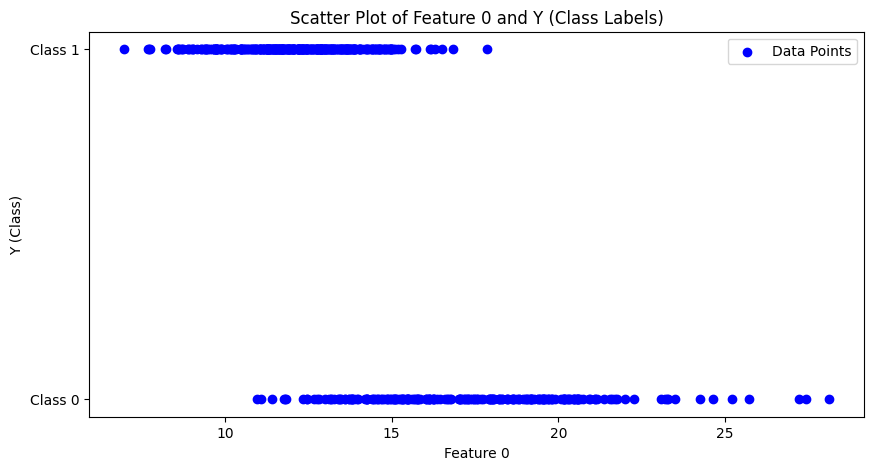

In [ ]:
# Plot the data points
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color="blue", label="Data Points")
plt.xlabel("Feature 0")
plt.ylabel("Y (Class)")
plt.title("Scatter Plot of Feature 0 and Y (Class Labels)")
plt.yticks([0, 1], ["Class 0", "Class 1"])
plt.legend()
plt.show()

2. Preparación y División de datos: No lo hacemos en este ejemplo

3. Selección del modelo y Entrenamiento

In [ ]:
# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, Y)


LogisticRegression()

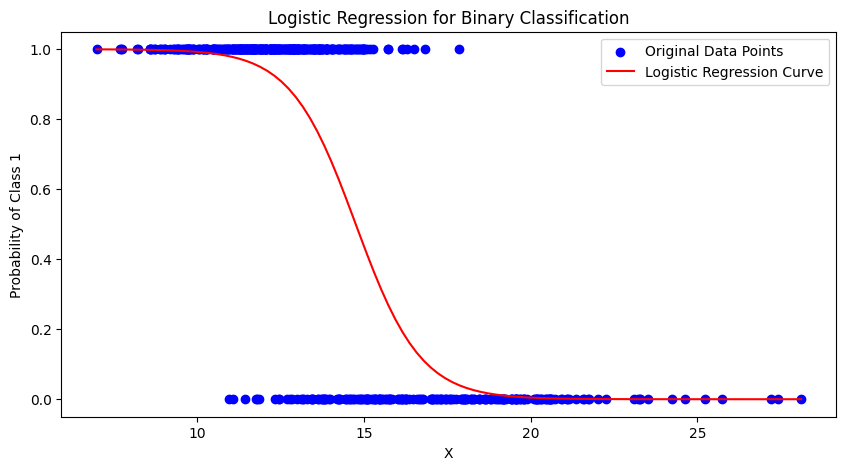

In [ ]:
# Plot the logistic regression curve
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_plot_prob = model.predict_proba(X_plot)[:, 1]  # Predicted probabilities for class 1

plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color="blue", label="Original Data Points")
plt.plot(X_plot, Y_plot_prob, color="red", label="Logistic Regression Curve")
plt.xlabel("X")
plt.ylabel("Probability of Class 1")
plt.title("Logistic Regression for Binary Classification")
plt.legend()
plt.show()

4. Evaluación del modelo: simplementes haremos una predicción y la visualizaremos

In [ ]:
# Generate a new X value and predict its class probability
X_new = np.array([2.5]).reshape(-1, 1)
Y_new_prob = model.predict_proba(X_new)[:, 1]
Y_new_class = model.predict(X_new)

print(X_new, Y_new_prob, Y_new_class)

[[2.5]] [0.99999651] [1]


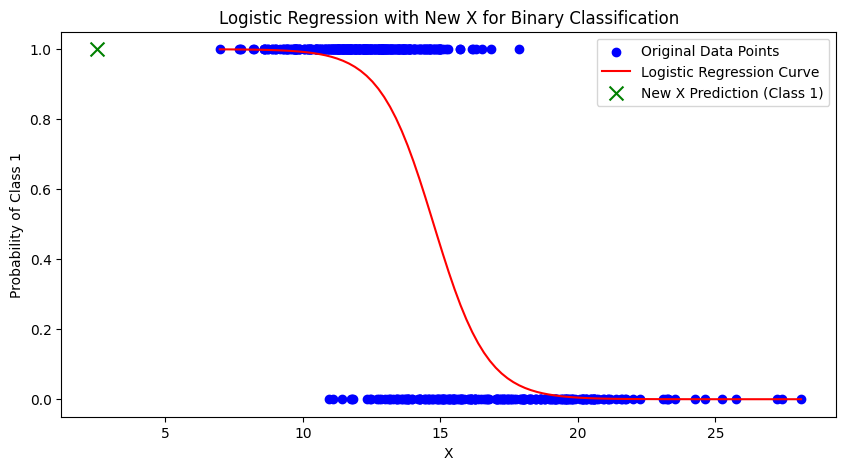

In [ ]:

# Show the new prediction on the plot
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color="blue", label="Original Data Points")
plt.plot(X_plot, Y_plot_prob, color="red", label="Logistic Regression Curve")
plt.scatter(X_new, Y_new_prob, color="green", marker="x", s=100, label=f"New X Prediction (Class {Y_new_class[0]})")
plt.xlabel("X")
plt.ylabel("Probability of Class 1")
plt.title("Logistic Regression with New X for Binary Classification")
plt.legend()
plt.show()

## Mi primera regresión logística con ajuste de hiperparámetros

Vamos a usar un dataset nuevo


*   Objetivo: Predecir el tipo de cobertura forestal (el tipo de cobertura arbórea predominante)
*   Clases de objetivos: 7 tipos de cobertura, etiquetados del 1 al 7.
*   Características: 54 características que incluyen elevación, aspecto, pendiente y varios indicadores de suelo y áreas silvestres.
*   Tamaño: Más de 500.000 muestras.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report

1. Carga datos

In [ ]:
# Load the Covertype dataset
data = fetch_covtype()
X = data.data
y = data.target

# Optionally, to speed up computation, use a subset of the data
# Uncomment the following lines if desired
X = X[:10000]
y = y[:10000]



In [ ]:
# Data exploration
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("Unique target classes:", np.unique(y))

pd.DataFrame(X, columns=[f'Feature {i}' for i in range(X.shape[1])]).head()

Feature matrix shape: (10000, 54)
Target vector shape: (10000,)
Unique target classes: [1 2 3 4 5 6 7]


,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 44,Feature 45,Feature 46,Feature 47,Feature 48,Feature 49,Feature 50,Feature 51,Feature 52,Feature 53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


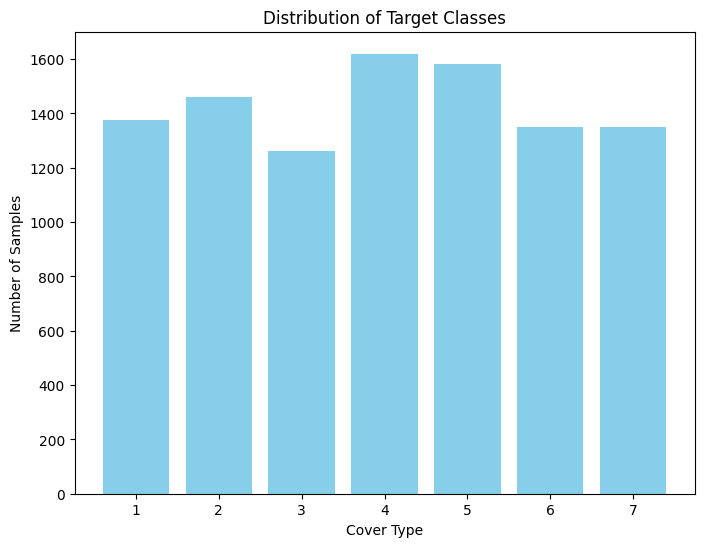

In [ ]:
# Plot the distribution of target classes
plt.figure(figsize=(8, 6))
classes, counts = np.unique(y, return_counts=True)
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Cover Type')
plt.ylabel('Number of Samples')
plt.title('Distribution of Target Classes')
plt.show()

La clase objetivo (Cover Type) es relativamente homogénea (no hay una categoría excesivamente sobre o infrarrepresentada), así que no aplicaremos técnicas de oversampling o undersampling.

Como este dataset tiene tantas variables es difícil visualizarlo, así que vamos a usar una transformación llamada Principal Components Analysis. No explicaremos los detalles teóricos, pero tenéis material adicional donde se explica.

Es una herramienta que usamos para reducir la dimensionalidad de un conjunto de datos.

Transforma un conjunto grande de variables en uno más pequeño que aún contiene la mayor parte de la información del conjunto grande. El proceso a alto nivel es el siguiente:

*   **Encuentra nuevos ejes**: PCA identifica nuevos ejes llamados componentes principales. Éstas son direcciones en el espacio de características a lo largo de las cuales los datos varían más (**Variance Maximization**). Estos nuevos ejes son ortogonales entre sí.
*   **Orden de los componentes**: los componentes principales se ordenan por la cantidad de variación que capturan. El primer componente principal captura la mayor varianza, el segundo captura la seguiente mayor cantidad, y así sucesivamente.
*   **Projección de datos**: los datos originales se proyectan en estos nuevos ejes, lo que reduce la cantidad de variables (**Dimensionality Reduction**) y conserva la información más importante.


Se usa para **simplificar** los datos, **visualizarlos** en 2 o 3 dimensiones, **eliminar ruido**, etc.



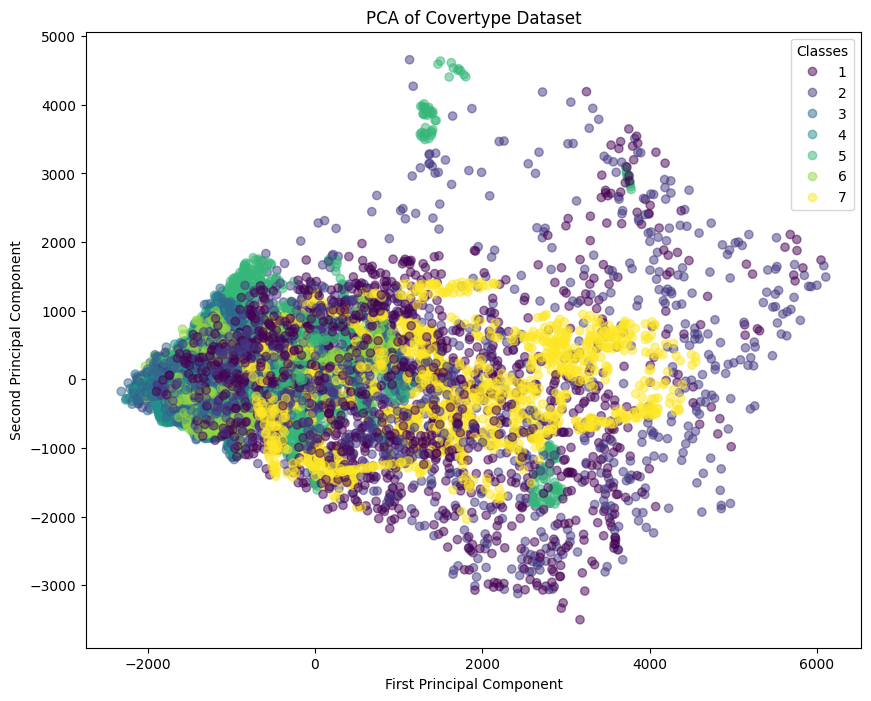

In [ ]:
# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2) # Vamos a reducir los datos a 2 dimensiones
X_pca = pca.fit_transform(X)

# Plot the first two principal components colored by target class
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Covertype Dataset')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

2. Preparación y División de datos

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


3. Selección del modelo, entrenamiento, validación y ajuste de hiper parámetros: seleccionamos los hiper parámetros a probar y el Grid Search

In [ ]:
# Definir una pipeline con preprocessing y el clasificador


## LO PONGO ANTES SIN COMENTARIOS PARA QUE DURANTE LA CLASE LOS MIREMOS
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier( # Vamos a implementar una regresión logística usando SGDClassifier en lugar de LogisticRegression
        loss='log_loss',
        max_iter=1000,
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=10,
        tol=1e-3,
        random_state=0
    ))
])


# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', SGDClassifier( # Vamos a implementar una regresión logística usando SGDClassifier en lugar de LogisticRegression
#         loss='log_loss', # Al ponerle esta loss function, entrenaremos una regresión logística
#         max_iter=1000, # Número de iteracciones máximas
#         early_stopping=True, # Activa el EarlyStopping
#         validation_fraction=0.2, # El 20% de los datos se usa para validacion
#         n_iter_no_change=10, # El entrenamiento se parará si el score de validacion no mejora en 5 iteraciones consecutivas
#         tol=1e-3, # Mejora mínima en la loss para continuar entrenando
#         random_state=0
#     ))
# ])


# Definir el rango de hiperparámetros a explorar
param_grid = {
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__penalty': ['l2', 'elasticnet'],
    'classifier__l1_ratio': [0.0, 0.5, 1.0],  # Un parámetro de regularización de elasticnet
}


# Definimos el GridSearch
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,                      # 3-fold cross-validation para ahorrarnos tiempo (dataset grande)
    scoring='accuracy',        # Evaluation metric
    n_jobs=-1,                 # Usar todos los cores (dataset grande)
    verbose=1
)


Vamos a implementar una regresión logística usando [SGDClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html) en lugar de LogisticRegression.

SGDClassifier sirve para entrenar clasificadores lineales. Por defecto, entrena un SVM, pero se puede controlar qué modelo entrenamos con el parámetro `loss`

Hemos usado `EarlyStoping`.

EarlyStoping es una técnica de regularización que se utiliza para evitar el overfitting en Machine Learning, especialmente en algoritmos iterativos como las redes neuronales. La idea es monitorear el desempeño del modelo en un conjunto de validación durante el entrenamiento y detener el proceso de entrenamiento cuando el desempeño deja de mejorar. Esto ayuda a evitar que el modelo aprenda ruido en los datos de entrenamiento, mejorando así su generalización a datos invisibles.

Detalles:
* El modelo reserva una parte de los datos de entrenamiento (especificados por `validation_fraction`) como conjunto de validación. Como hacemos cross-validation con 3 fold, partimos el dataset en 3 partes y usamos 2 para entrenar y una para validar. De las 2 de entrenamiento, el 80% se usa para entrenar y el 20% se reserva para comprobar el `EarlyStoping`. Y luego se usa la tercera parte para la validación normal de CV.
* El proceso de formación monitorea la puntuación en el conjunto de validación.
* Si la puntuación de validación no mejora durante `n_iter_no_change` iteraciones consecutivas, el entrenamiento se detiene.

Impacto en la formación modelo:
* Evita el sobreajuste: detiene el entrenamiento antes de que el modelo comience a sobreajustar los datos de entrenamiento.
* Reduce el Tiempo de Entrenamiento: Evita iteraciones innecesarias, ahorrando recursos computacionales.


In [ ]:
# Ejecutar el GridSearchCV (tardará un poco)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores Parámetros Encontrados:")
print(grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejores Parámetros Encontrados:
{'classifier__alpha': 0.001, 'classifier__l1_ratio': 1.0, 'classifier__penalty': 'elasticnet'}


In [ ]:
# Número de iteraciones del best_estimator
n_iter = grid_search.best_estimator_.named_steps['classifier'].n_iter_
print(f"Número de iteraciones: {n_iter}")


Número de iteraciones: 38


4. Evaluar el modelo

In [ ]:
# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nMatriz de Confusión del Mejor Modelo:")
print(confusion_matrix(y_test, y_pred_best))
print("\nReporte de Clasificación del Mejor Modelo:")
print(classification_report(y_test, y_pred_best))


Matriz de Confusión del Mejor Modelo:
[[141  64   0   0  16   2  35]
 [ 57 150   4   0  67   2   2]
 [  0   1  81  49  31 104   0]
 [  0   0  10 298   0  18   0]
 [  1  31  18   0 240  20   0]
 [  0  21  47  35  26 156   0]
 [ 19   0   0   0   0   0 254]]

Reporte de Clasificación del Mejor Modelo:
              precision    recall  f1-score   support

           1       0.65      0.55      0.59       258
           2       0.56      0.53      0.55       282
           3       0.51      0.30      0.38       266
           4       0.78      0.91      0.84       326
           5       0.63      0.77      0.70       310
           6       0.52      0.55      0.53       285
           7       0.87      0.93      0.90       273

    accuracy                           0.66      2000
   macro avg       0.65      0.65      0.64      2000
weighted avg       0.65      0.66      0.65      2000



# KNN

## Mi primer KNN

In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

1. Cargar datos

Datos de Clasificación (Iris):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


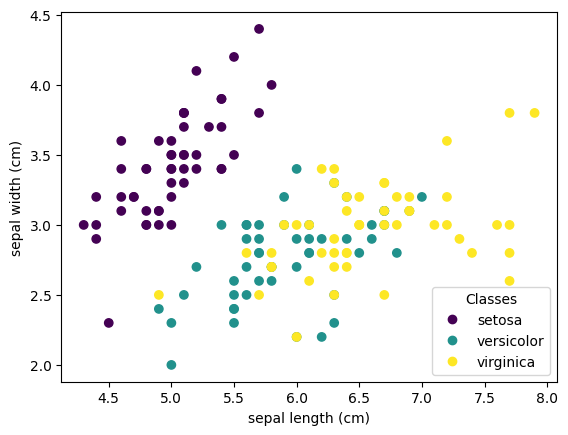

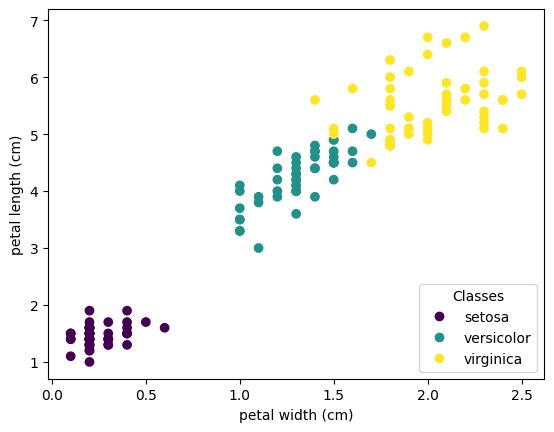

In [ ]:
# Cargar el dataset Iris
data = load_iris()
X = data.data
y = data.target

# Mostrar las primeras filas
print("Datos de Clasificación (Iris):")
display(pd.DataFrame(X, columns=data.feature_names))
display(pd.Series(y, name='Species'))


_, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set(xlabel=data.feature_names[0], ylabel=data.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], data.target_names, loc="lower right", title="Classes"
)
_, ax = plt.subplots()
scatter = ax.scatter(X[:, 3], X[:, 2], c=y)
ax.set(xlabel=data.feature_names[3], ylabel=data.feature_names[2])
_ = ax.legend(
    scatter.legend_elements()[0], data.target_names, loc="lower right", title="Classes"
)

2. Limpieza, Preparación y División de datos


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

3. Selección del modelo, entrenamiento, validación y ajuste de hiper parámetros

In [ ]:

# Crear una pipeline que incluye el escalado y el clasificador
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5, metric='euclidean'))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(metric='euclidean'))])

En este caso es especialmente importante usar el StandardScaler(). El método KNN está obviamente basado en distancias, así que es muy importante tenerlas todas en el mismo rango. En este caso, las ponemos con media 0 y varianza 1.

4. Evaluar el modelo

In [ ]:
# Realizar predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.96      0.92        23
           2       0.95      0.86      0.90        21

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



## Mi primer KNN con ajuste de hiperparámetros

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

1. Carga de datos

Feature matrix shape: (10000, 54)
Target vector shape: (10000,)
Unique target classes: [1 2 3 4 5 6 7]


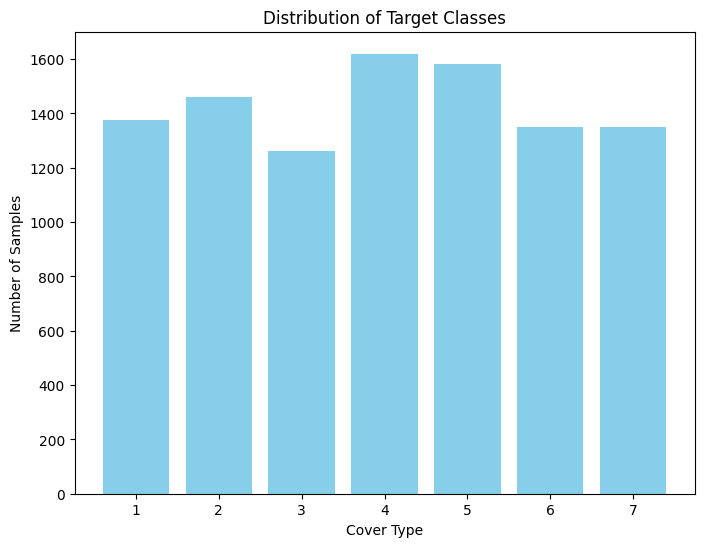

In [ ]:
# Load the Covertype dataset
data = fetch_covtype()
X = data.data
y = data.target

# Para acelerar la computación, usamos un subset de los datos
X = X[:10000]
y = y[:10000]

# Data exploration
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("Unique target classes:", np.unique(y))

# Plot la distribución de la variable dependiente
plt.figure(figsize=(8, 6))
classes, counts = np.unique(y, return_counts=True)
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Cover Type')
plt.ylabel('Number of Samples')
plt.title('Distribution of Target Classes')
plt.show()


2. Limpieza, Preparación y División de datos

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
    )

3. Selección del modelo, entrenamiento, validación y ajuste de hiper parámetros

In [ ]:
# Define a pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the hyperparameter grid to search
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__weights': ['uniform', 'distance'] # Peso de las distintas observaciones. Uniform: todas las observciones tienen el mismo peso. distance: los puntos más cercanos tienen más influencia
}

# Implement GridSearchCV with the pipeline
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), # Mejora sobre CV estándar
    scoring='accuracy',        # Métrica de evaluación
    verbose=1
)

# Execute GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best Parameters Found:")
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters Found:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}


Una mejora sobre la CV normal es usar StratifiedKFold. Básicamente, StratifiedKFold se asegura de que al dividir entre training y validación, el porcentaje de muestras de cada clase se mantenga constante.

4. Evaluar

In [ ]:
# Realizar predicciones
y_pred = grid_search.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[166  56   0   0  21   1  31]
 [ 47 192   3   1  35  13   1]
 [  0   1 157  27   7  60   0]
 [  0   0   5 305   0  14   0]
 [  7   8   4   0 289   9   0]
 [  0   1  33  22   3 211   0]
 [  7   2   0   0   0   0 261]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.73      0.60      0.66       275
           2       0.74      0.66      0.70       292
           3       0.78      0.62      0.69       252
           4       0.86      0.94      0.90       324
           5       0.81      0.91      0.86       317
           6       0.69      0.78      0.73       270
           7       0.89      0.97      0.93       270

    accuracy                           0.79      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000



# Cálculo de métricas

Vamos a entrenar una regresión logísticas y un KNN y compararemos sus métricas

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_fscore_support
)
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para gráficos
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

1. Cargar el dataset

In [ ]:
# 1. Cargar el dataset de Cáncer de Mama de Wisconsin
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

2. Preparación y División de datos


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)


3. Selección del modelo, entrenamiento, validación y ajuste de hiper parámetros

In [ ]:

# Implementación de Regresión Logística
lr_model = LogisticRegression(
              solver='liblinear',  # Adecuado para conjuntos de datos pequeños
              random_state=0
          )
pipeline_logistic = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_model', lr_model)
])

# Entrenar el modelo de Regresión Logística y hacer predicciones con el dataset de test
pipeline_logistic.fit(X_train, y_train)
y_pred_logistic = pipeline_logistic.predict(X_test)
y_prob_logistic = pipeline_logistic.predict_proba(X_test)[:, 1]

# 5. Implementación de K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(
    n_neighbors=5,        # Valor inicial de K
    metric='euclidean',   # Métrica de distancia
    weights='uniform'     # Ponderación uniforme
)

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_model', knn_model)
])

# Entrenar el modelo de KNN y hacer predicciones con el dataset de test
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)
y_prob_knn = pipeline_knn.predict_proba(X_test)[:, 1]





4. Evaluación

--- Regresión Logística ---


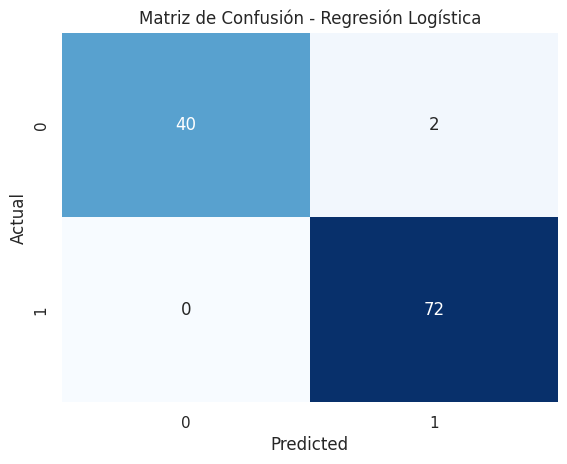

Reporte de Clasificación - Regresión Logística:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        42
      benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Precisión: 0.9730
Recall (Sensibilidad): 1.0000
F1-Score: 0.9863
ROC AUC: 0.9957



In [ ]:
# 6. Función para calcular y mostrar métricas
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"--- {model_name} ---")
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Output report
    report = classification_report(y_true, y_pred, target_names=target_names)
    print(f"Reporte de Clasificación - {model_name}:\n{report}")

    # Precision, Recall and F1
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    roc_auc = auc(*roc_curve(y_true, y_prob)[:2])
    print(f"Precisión: {precision:.4f}")
    print(f"Recall (Sensibilidad): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}\n")

# 7. Evaluar el modelo de Regresión Logística
evaluate_model(y_test, y_pred_logistic, y_prob_logistic, "Regresión Logística")

--- K-Nearest Neighbors (KNN) ---


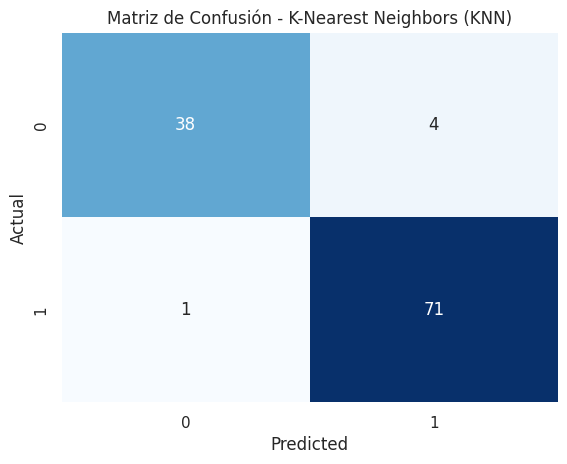

Reporte de Clasificación - K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Precisión: 0.9467
Recall (Sensibilidad): 0.9861
F1-Score: 0.9660
ROC AUC: 0.9706



In [ ]:
# 8. Evaluar el modelo KNN
evaluate_model(y_test, y_pred_knn, y_prob_knn, "K-Nearest Neighbors (KNN)")

In [ ]:

# Comparación de Métricas
metrics = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'K-Nearest Neighbors (KNN)'],
    'Precisión': [
        precision_recall_fscore_support(y_test, y_pred_logistic, average='binary')[0],
        precision_recall_fscore_support(y_test, y_pred_knn, average='binary')[0]
    ],
    'Recall (Sensibilidad)': [
        precision_recall_fscore_support(y_test, y_pred_logistic, average='binary')[1],
        precision_recall_fscore_support(y_test, y_pred_knn, average='binary')[1]
    ],
    'F1-Score': [
        precision_recall_fscore_support(y_test, y_pred_logistic, average='binary')[2],
        precision_recall_fscore_support(y_test, y_pred_knn, average='binary')[2]
    ],
    'ROC AUC': [
        auc(*roc_curve(y_test, y_prob_logistic)[:2]),
        auc(*roc_curve(y_test, y_prob_knn)[:2])
    ]
})

print("Comparación de Métricas:")
print(metrics)



Comparación de Métricas:
                      Modelo  Precisión  Recall (Sensibilidad)  F1-Score  \
0        Regresión Logística   0.972973               1.000000  0.986301   
1  K-Nearest Neighbors (KNN)   0.946667               0.986111  0.965986   

    ROC AUC  
0  0.995701  
1  0.970569  


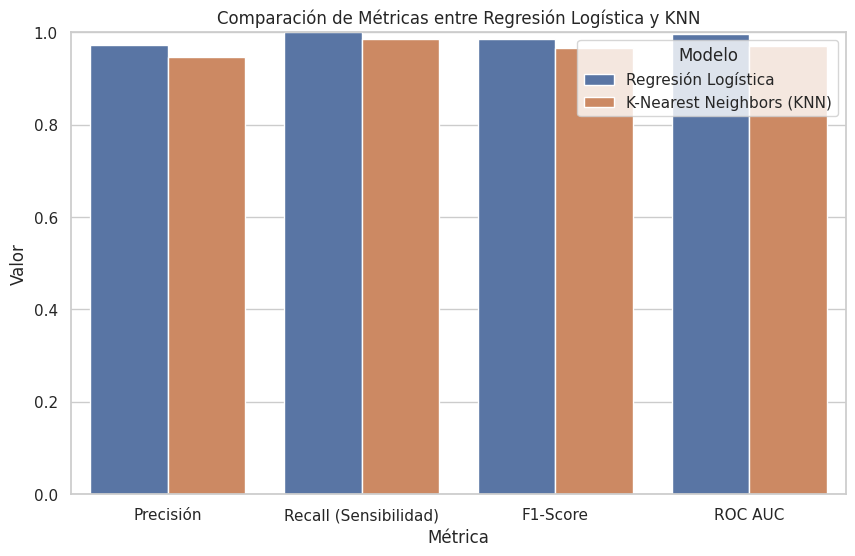

In [ ]:
# Visualización de Comparación de Métricas
metrics_melted = metrics.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Métrica', y='Valor', hue='Modelo')
plt.title('Comparación de Métricas entre Regresión Logística y KNN')
plt.ylim(0, 1)
plt.show()